<center><img src="https://github.com/DACSS-Spatial/data_forSpatial/raw/main/logo.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/DACSS-Spatial/The-Thematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [1]:
import geopandas as gpd

linkGit='https://github.com/DACSS-Spatial/data_forSpatial/raw/refs/heads/main/'
linkWorldMaps='WORLD/worldMaps.gpkg'

We can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [2]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [3]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [4]:
import pandas as pd

someDataLink='WORLD/some_dataworld.csv'

someData=pd.read_csv(linkGit+someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       172 non-null    object 
 1   iso2          171 non-null    object 
 2   iso3          172 non-null    object 
 3   region        172 non-null    object 
 4   fragility     172 non-null    float64
 5   co2           172 non-null    int64  
 6   sq_km         172 non-null    int64  
 7   num_airports  172 non-null    int64  
 8   population    172 non-null    int64  
 9   mobiles       172 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 13.6+ KB


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [5]:
someData.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
1,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000
4,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000


Preparing thematic maps requires **social data** about the geometry (line, polygon, point). The "countries" geoDF has no social data, so the preprocessing requires merging the DF into the GDF.

Merging is not a trivial process. For this case, it will even require fuzzy merging. You may see the full mergin process in this [GoogleColab notebook](https://colab.research.google.com/drive/1iGTr8z1Bo8sitgg7uNcKh33pwleymb8O?usp=sharing).

We will use the file produced by that colab notebook

In [6]:
linkToIndicators="https://github.com/DACSS-Spatial/data_forSpatial/raw/refs/heads/main/WORLD/worldindicators.json"
theMapAndData=gpd.read_file(linkToIndicators)
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       172 non-null    object  
 1   iso2          171 non-null    object  
 2   iso3          172 non-null    object  
 3   region        172 non-null    object  
 4   fragility     172 non-null    float64 
 5   co2           172 non-null    int64   
 6   sq_km         172 non-null    int32   
 7   num_airports  172 non-null    int32   
 8   population    172 non-null    int32   
 9   mobiles       172 non-null    int32   
 10  geometry      172 non-null    geometry
dtypes: float64(1), geometry(1), int32(4), int64(1), object(4)
memory usage: 12.2+ KB


As you see, the columns from the DF (someData) are now part of the GDF (countries), that is now in this new GDF theMapAndData.

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use **dots** to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's see the regions we have:

In [7]:
theMapAndData.region.value_counts()

region
AFRICA                               52
EUROPE                               37
CENTRAL AMERICA AND THE CARIBBEAN    16
MIDDLE EAST                          16
EAST AND SOUTHEAST ASIA              15
SOUTH AMERICA                        12
SOUTH ASIA                            8
AUSTRALIA AND OCEANIA                 7
CENTRAL ASIA                          6
NORTH AMERICA                         3
Name: count, dtype: int64

### Preprocessing: Filtering

Let's keep Africa for this session:

<Axes: >

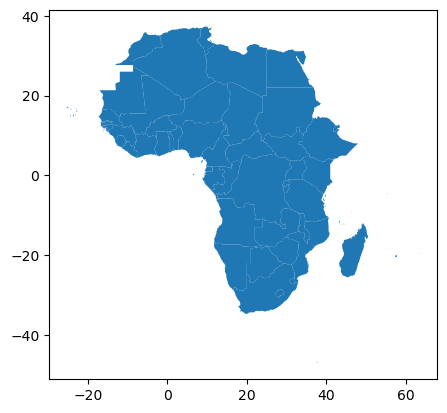

In [9]:
Africa=theMapAndData[theMapAndData.region=='AFRICA']
Africa.plot()

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

Every dot represents the same amount, then a DDM uses raw counts (non-normalized). The size of all dots on the map are the same, which  ensures a consistent visual comparison.

### Preprocessing: UNIT of the dots

We need to create a map of dots, a new layer. The source will be the Africa polygons we currently have. Let's do that first:

In [44]:
# a copy of Africa
temporal_gdf=Africa.copy()

# the row names will be the country
temporal_gdf.set_index('Country',inplace=True)

# we have this now
temporal_gdf.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4..."
BOTSWANA,BW,BWA,AFRICA,59.5,5965000,581730,122,2450668,4440000,"MULTIPOLYGON (((26.40114 -24.63189, 26.38996 -..."
BENIN,BJ,BEN,AFRICA,73.6,6903000,112622,10,14697052,16400000,"MULTIPOLYGON (((2.73295 7.65821, 2.73222 7.651..."
BURUNDI,BI,BDI,AFRICA,98.2,715000,27830,6,13590102,8650000,"MULTIPOLYGON (((30.84366 -2.97879, 30.83723 -2..."


Let's see the distribution of _population_:

In [45]:
temporal_gdf.population.describe()

count    5.200000e+01
mean     2.819346e+07
std      4.110229e+07
min      9.818700e+04
25%      2.733577e+06
50%      1.434162e+07
75%      3.366049e+07
max      2.367471e+08
Name: population, dtype: float64

Let's add a column to  temporal_gdf a new column, that represents the amount of dots to represent, in this case, population. Here, we propose that a dot represents 10,000 people:

In [46]:
# creating  column 
unit_value = 10000 
temporal_gdf['num_dots'] = (temporal_gdf['population'] / unit_value).astype(int)

# see
temporal_gdf['num_dots'].head(10)

Country
ALGERIA                              4702
ANGOLA                               3720
BOTSWANA                              245
BENIN                                1469
BURUNDI                              1359
CHAD                                 1909
CONGO                                 609
DEMOCRATIC REPUBLIC OF THE CONGO    11540
CAMEROON                             3096
COMOROS                                90
Name: num_dots, dtype: int64

### Preprocessing: Dots placement

Since we know how many dots per country polygon we should have, now we need to place that amount of dots within the borders of the polygon:

In [47]:
# enter 'sample_points()'
temporal_gdf.sample_points(size=temporal_gdf['num_dots'],rng=123).head(10)

Country
ALGERIA                             MULTIPOINT ((-8.554 27.50846), (-8.54557 27.38...
ANGOLA                              MULTIPOINT ((11.7572 -15.84167), (11.79428 -16...
BOTSWANA                            MULTIPOINT ((20.05134 -22.23562), (20.13952 -2...
BENIN                               MULTIPOINT ((0.8261 10.44313), (0.84539 10.508...
BURUNDI                             MULTIPOINT ((28.9869 -2.79094), (28.9966 -2.80...
CHAD                                MULTIPOINT ((13.52559 14.35282), (13.54005 14....
CONGO                               MULTIPOINT ((11.39387 -3.96554), (11.41961 -3....
DEMOCRATIC REPUBLIC OF THE CONGO    MULTIPOINT ((12.40678 -5.94138), (12.47682 -5....
CAMEROON                            MULTIPOINT ((8.51433 4.53439), (8.65237 4.6020...
COMOROS                             MULTIPOINT ((43.24003 -11.77038), (43.24521 -1...
Name: sampled_points, dtype: geometry

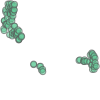

In [48]:
# this is the case of Comoros:
temporal_gdf.sample_points(size=temporal_gdf['num_dots'],rng=123).loc['COMOROS']

### Preprocessing: building GDF from GS

The current result:

In [66]:
type(temporal_gdf.sample_points(size=temporal_gdf['num_dots'],rng=123))

geopandas.geoseries.GeoSeries

As usual, that GeoS is turned into a GeoDF:

In [67]:
Africa_dots=gpd.GeoDataFrame(geometry=temporal_gdf.sample_points(size=temporal_gdf['num_dots'],rng=123))
Africa_dots

,geometry
Country,
ALGERIA,"MULTIPOINT ((-8.554 27.50846), (-8.54557 27.38..."
ANGOLA,"MULTIPOINT ((11.7572 -15.84167), (11.79428 -16..."
BOTSWANA,"MULTIPOINT ((20.05134 -22.23562), (20.13952 -2..."
BENIN,"MULTIPOINT ((0.8261 10.44313), (0.84539 10.508..."
BURUNDI,"MULTIPOINT ((28.9869 -2.79094), (28.9966 -2.80..."
CHAD,"MULTIPOINT ((13.52559 14.35282), (13.54005 14...."
CONGO,"MULTIPOINT ((11.39387 -3.96554), (11.41961 -3...."
DEMOCRATIC REPUBLIC OF THE CONGO,"MULTIPOINT ((12.40678 -5.94138), (12.47682 -5...."
CAMEROON,"MULTIPOINT ((8.51433 4.53439), (8.65237 4.6020..."


Now you have a GDF:

In [68]:
Africa_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, ALGERIA to SOUTH SUDAN
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  52 non-null     geometry
dtypes: geometry(1)
memory usage: 2.9+ KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

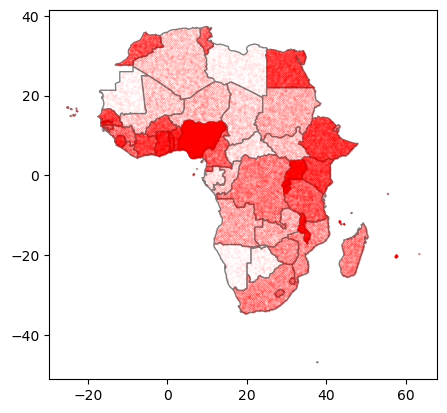

In [69]:
base=Africa.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
Africa_dots.plot(markersize=0.02, color='red',ax=base, alpha=0.2)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

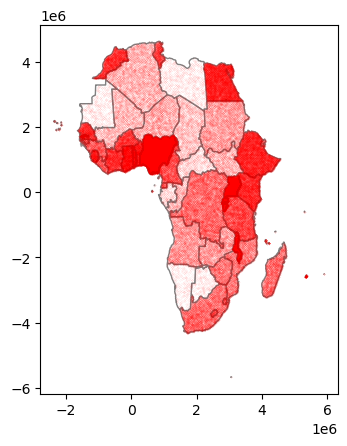

In [70]:
base=Africa.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
Africa_dots.to_crs(8857).plot(markersize=0.02, color='red',ax=base, alpha=0.2)

Let's set our current layers to that crs:

In [71]:
Africa_8857=Africa.to_crs(8857)
Africa_dots_8857=Africa_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: location for the symbol

1. We need one symbol per polygon, an obvious choice is the centroid.

In [72]:
Africa_8857_locations = Africa_8857.copy()

# Africa_8857_locations will have a new geometry:
Africa_8857_locations['geometry'] = Africa_8857_locations['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [73]:
Africa_8857_locations['size'] = Africa_8857_locations['population'].apply(lambda x: x**0.5/100)

We got the basics, then:

<Axes: >

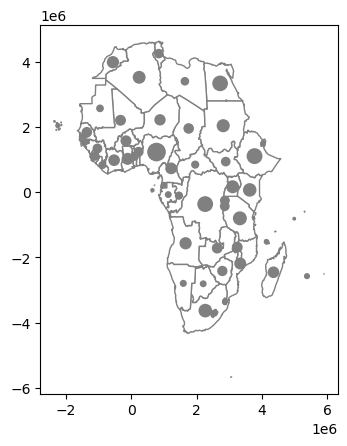

In [74]:
base=Africa_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
Africa_8857_locations.plot(
    ax=base,
    markersize=Africa_8857_locations['size'],
    color='grey'
)

Keep in mind that the standard way of computing centroids may bring some trouble if you have multipolygons (archipelagos?). Let´s plot Seychelles:

In [75]:
base=Africa_8857[Africa_8857.Country=="SEYCHELLES"].explore()
Africa_8857_locations[Africa_8857_locations.Country=="SEYCHELLES"].explore(m=base,color="red")

The location is nowhere within a polygon. An  alternative is **representative_point()**:

In [76]:
# replace the points
Africa_8857_locations["geometry"]=Africa_8857.representative_point()

We will keep that last result.

In [77]:
base=Africa_8857[Africa_8857.Country=="SEYCHELLES"].explore()
Africa_8857_locations[Africa_8857_locations.Country=="SEYCHELLES"].explore(m=base,color="red")

### Preprocessing: Improving visual message

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

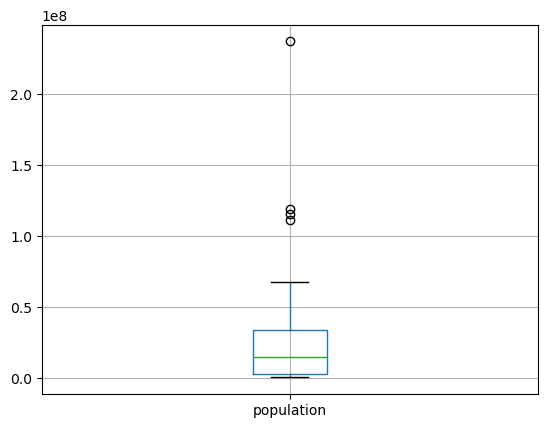

In [78]:
boxplotInfo=Africa_8857_locations.boxplot(column='population',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [79]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([115403027, 111247248, 118550298, 236747130], dtype=object)

Then, these are the outlying countries:

In [80]:
Africa_8857_locations[Africa_8857_locations.population.isin(outliers)]

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size
32,DEMOCRATIC REPUBLIC OF THE CONGO,CD,COD,AFRICA,110.2,2653000,2344858,273,115403027,49800000,POINT (2150454.367 -516111.79),107.425801
48,EGYPT,EG,EGY,AFRICA,88.4,235137000,1001450,73,111247248,106000000,POINT (2678759.188 3375702.424),105.473811
53,ETHIOPIA,ET,ETH,AFRICA,94.2,16798000,1104300,58,118550298,71400000,POINT (3713238.555 1171240.545),108.880805
112,NIGERIA,NG,NGA,AFRICA,98.5,104494000,923768,50,236747130,224000000,POINT (754640.377 1162553.003),153.865893


Knowing this information, we can create a column as outlier flag:

In [81]:
Africa_8857_locations['population_outlier']=Africa_8857_locations.population.isin(outliers)*1

## see
Africa_8857_locations

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,population_outlier
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000,POINT (58149.408 3504624.452),68.572934,0
6,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000,POINT (1789934.856 -1524650.389),60.993492,0
12,BOTSWANA,BW,BWA,AFRICA,59.5,5965000,581730,122,2450668,4440000,POINT (2262432.346 -2828174.988),15.654610,0
19,BENIN,BJ,BEN,AFRICA,73.6,6903000,112622,10,14697052,16400000,POINT (219186.939 1191134.38),38.336734,0
26,BURUNDI,BI,BDI,AFRICA,98.2,715000,27830,6,13590102,8650000,POINT (2865100.606 -433659.14),36.864756,0
29,CHAD,TD,TCD,AFRICA,108.5,1771000,1284000,44,19093595,12100000,POINT (1747642.958 1965809.757),43.696218,0
31,CONGO,CG,COG,AFRICA,92.5,4523000,342000,56,6097665,5870000,POINT (1540711.045 -82846.788),24.693451,0
32,DEMOCRATIC REPUBLIC OF THE CONGO,CD,COD,AFRICA,110.2,2653000,2344858,273,115403027,49800000,POINT (2150454.367 -516111.79),107.425801,1
35,CAMEROON,CM,CMR,AFRICA,97.0,7105000,475440,37,30966105,26200000,POINT (1299556.828 944934.755),55.647197,0
36,COMOROS,KM,COM,AFRICA,81.7,326000,2235,3,900141,934000,POINT (4208450.609 -1564478.31),9.487576,0


We can use that like this:

<Axes: >

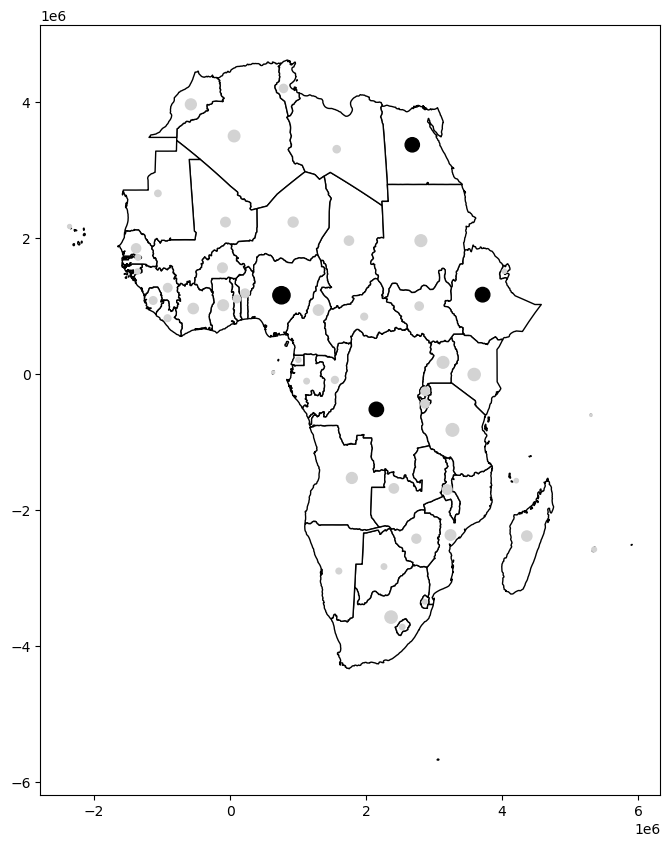

In [82]:
base = Africa_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
Africa_8857_locations.plot(
    ax=base,
    markersize=Africa_8857_locations['size'],
    color=Africa_8857_locations['population_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two new maps of locations:

In [86]:
# Create explicit copies of the DataFrames
Africa_8857_locations_out = Africa_8857_locations[Africa_8857_locations.population_outlier==1].copy()
Africa_8857_locations_no_out = Africa_8857_locations[Africa_8857_locations.population_outlier==0].copy()

2. Re plot the three layers, using some color gradient for the non-outliers:

<Axes: >

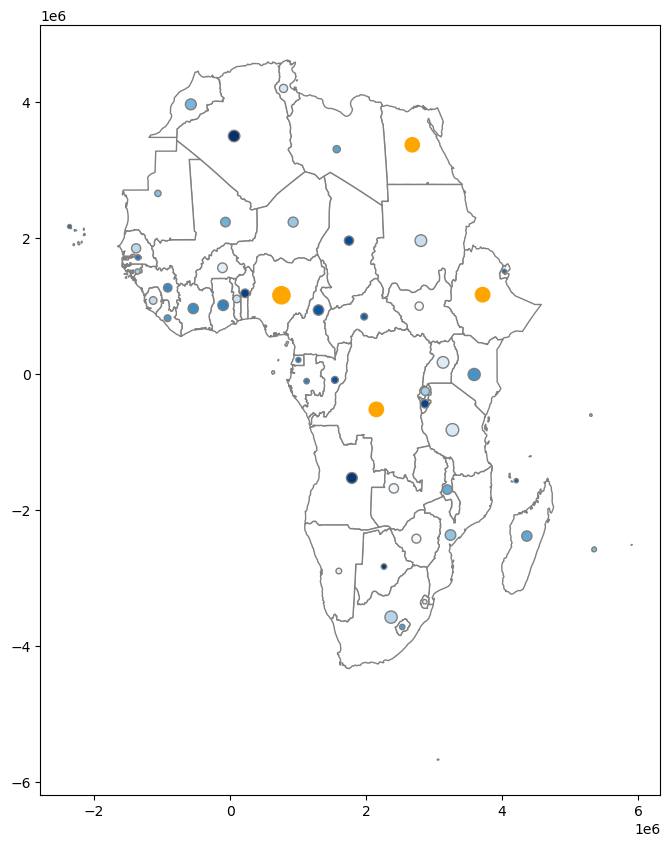

In [87]:
base=Africa_8857.plot(color='white', edgecolor='grey',figsize=(10,10))

Africa_8857_locations_no_out.plot(
    ax=base,
    markersize=Africa_8857_locations_no_out['size'],
    edgecolor='grey',
    c=Africa_8857_locations_no_out['size'],
    cmap='Blues_r'
)
Africa_8857_locations_out.plot(
    ax=base,
    markersize=Africa_8857_locations_out['size'],
    color='orange'
)

# Thematics: Choropleths

Notice that we do not normalized DDMs nor PSMs: data is just a count or a representation of counts. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

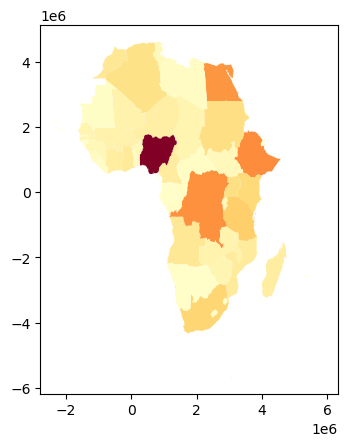

In [90]:
Africa_8857.plot(Africa_8857.population,cmap="YlOrRd")

* This **IS** a choropleth:

<Axes: >

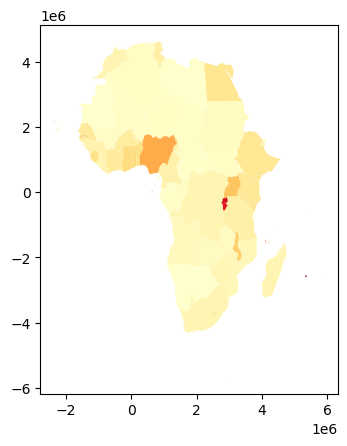

In [91]:
Africa_8857.plot(Africa_8857.population/Africa_8857.sq_km,cmap="YlOrRd")

Choropleths are great to represent normalized indicators such as:
* Densities
* Proportion
* Ratios
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [ ]:
## do you have these installed?
# ! pip show numba mapclassify numpy

We will discretize this:

In [92]:
Africa_8857['population_density']=Africa_8857.population/Africa_8857.sq_km

Let's explore the bining algorithms:

In [93]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=Africa_8857['population_density']

# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [94]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

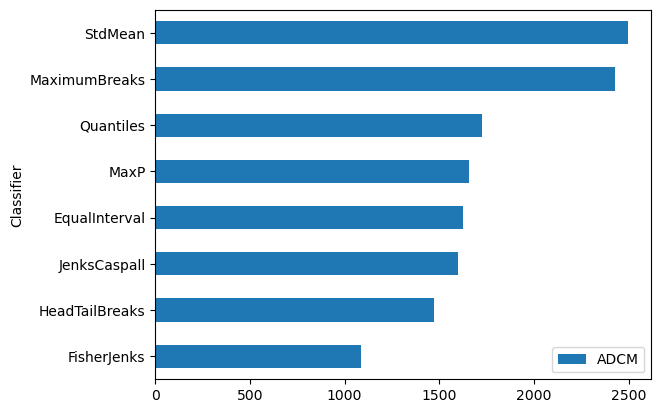

In [95]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [98]:
Africa_8857['population_density_FJ5'] = fj5.yb # yb will give you a numeric label

In [99]:
# there you are
Africa_8857[['population_density','population_density_FJ5']].head(20)

,population_density,population_density_FJ5
2,19.742908,0
6,29.840428,0
12,4.212724,0
19,130.498943,1
26,488.325620,3
29,14.870401,0
31,17.829430,0
32,49.215358,0
35,65.131468,0
36,402.747651,3


We could create a copy of that column to add descriptive labels:

In [100]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

Africa_8857['population_density_FJ5_cat']=Africa_8857.loc[:,'population_density_FJ5'].replace(newLabelsForLevels)

# we have
Africa_8857[['population_density','population_density_FJ5','population_density_FJ5_cat']].head(20)

,population_density,population_density_FJ5,population_density_FJ5_cat
2,19.742908,0,0_VeryLow
6,29.840428,0,0_VeryLow
12,4.212724,0,0_VeryLow
19,130.498943,1,1_Low
26,488.325620,3,3_High
29,14.870401,0,0_VeryLow
31,17.829430,0,0_VeryLow
32,49.215358,0,0_VeryLow
35,65.131468,0,0_VeryLow
36,402.747651,3,3_High


We are ready for a discrete choropleth:

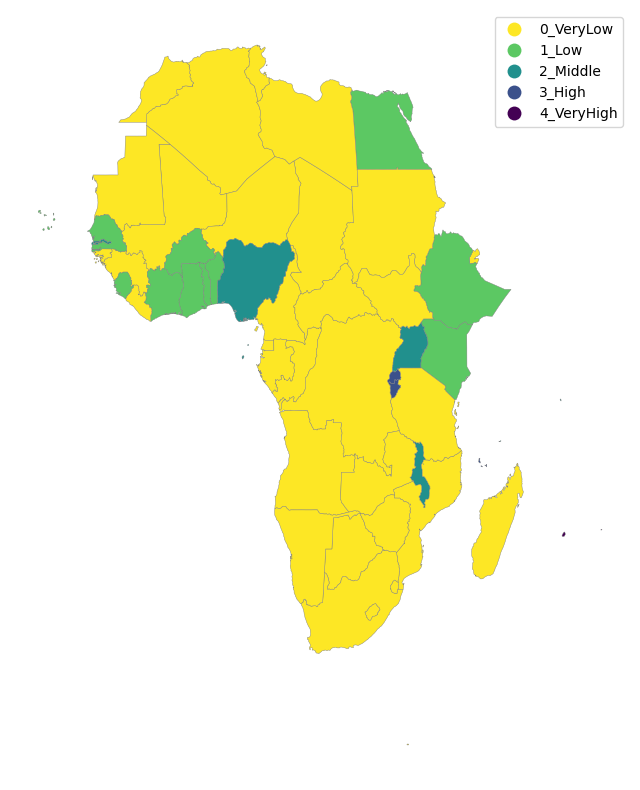

In [101]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
Africa_8857.plot(column='population_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save these maps for R.

In [102]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_3
theMapAndData
Africa
temporal_gdf
_14
_16
_17
_18
_19
_22
Africa_dots
_43
_44
Africa_8857
Africa_dots_8857
_65
_67
Africa_8857_locations
_80
_81
Africa_8857_locations_out
Africa_8857_locations_no_out


These are the ones needed in R:

In [103]:
# for choropleth and base map
Africa_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, 2 to 169
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Country                     52 non-null     object  
 1   iso2                        51 non-null     object  
 2   iso3                        52 non-null     object  
 3   region                      52 non-null     object  
 4   fragility                   52 non-null     float64 
 5   co2                         52 non-null     int64   
 6   sq_km                       52 non-null     int32   
 7   num_airports                52 non-null     int32   
 8   population                  52 non-null     int32   
 9   mobiles                     52 non-null     int32   
 10  geometry                    52 non-null     geometry
 11  population_density          52 non-null     float64 
 12  population_density_FJ5      52 non-null     int64   
 13  population_density

In [104]:
# for DDMs
Africa_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, ALGERIA to SOUTH SUDAN
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  52 non-null     geometry
dtypes: geometry(1)
memory usage: 2.9+ KB


In [106]:
# for PSMs
Africa_8857_locations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, 2 to 169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             52 non-null     object  
 1   iso2                51 non-null     object  
 2   iso3                52 non-null     object  
 3   region              52 non-null     object  
 4   fragility           52 non-null     float64 
 5   co2                 52 non-null     int64   
 6   sq_km               52 non-null     int32   
 7   num_airports        52 non-null     int32   
 8   population          52 non-null     int32   
 9   mobiles             52 non-null     int32   
 10  geometry            52 non-null     geometry
 11  size                52 non-null     float64 
 12  population_outlier  52 non-null     int64   
dtypes: float64(2), geometry(1), int32(4), int64(2), object(4)
memory usage: 6.9+ KB


In [107]:
# for PSMs
Africa_8857_locations_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4 entries, 32 to 112
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             4 non-null      object  
 1   iso2                4 non-null      object  
 2   iso3                4 non-null      object  
 3   region              4 non-null      object  
 4   fragility           4 non-null      float64 
 5   co2                 4 non-null      int64   
 6   sq_km               4 non-null      int32   
 7   num_airports        4 non-null      int32   
 8   population          4 non-null      int32   
 9   mobiles             4 non-null      int32   
 10  geometry            4 non-null      geometry
 11  size                4 non-null      float64 
 12  population_outlier  4 non-null      int64   
dtypes: float64(2), geometry(1), int32(4), int64(2), object(4)
memory usage: 384.0+ bytes


In [108]:
# for PSMs
Africa_8857_locations_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 48 entries, 2 to 169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             48 non-null     object  
 1   iso2                47 non-null     object  
 2   iso3                48 non-null     object  
 3   region              48 non-null     object  
 4   fragility           48 non-null     float64 
 5   co2                 48 non-null     int64   
 6   sq_km               48 non-null     int32   
 7   num_airports        48 non-null     int32   
 8   population          48 non-null     int32   
 9   mobiles             48 non-null     int32   
 10  geometry            48 non-null     geometry
 11  size                48 non-null     float64 
 12  population_outlier  48 non-null     int64   
dtypes: float64(2), geometry(1), int32(4), int64(2), object(4)
memory usage: 4.5+ KB


The file **africa_8857.gpkg** will keep all those maps as layers!

In [109]:
Africa_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='continent')
Africa_dots_8857.to_file("africa_8857.gpkg",driver='GPKG',layer='population_ddm')
Africa_8857_locations.to_file("africa_8857.gpkg",driver='GPKG',layer='population_psm')
Africa_8857_locations_out.to_file("africa_8857.gpkg",driver='GPKG',layer='outlier_population_psm')
Africa_8857_locations_no_out.to_file("africa_8857.gpkg",driver='GPKG',layer='no_outlier_population_psm')